## **Name : Tanveer Sharma** </br>
## **Roll Number : 22M1062**

# Assignment 1 Linear Regression from Scratch
Link for video explanation  : https://iitbacin-my.sharepoint.com/:v:/g/personal/22m1062_iitb_ac_in/EUw_5BZbrpNGgsB8-L063_cBFVXADajH5BHtWcqfVYBLeg?e=DsLkr2

In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split #only used to split dta into test and train

#### Task 1 Function to generate a data matrix X.

In [3]:
def input_x(samples=5,dimension=3):# default sample size 5 and dimensions =3
  in_x1=np.ndarray(shape=(samples,dimension))
  for i in range(samples):
    for j in range(dimension):
       in_x1[i,j]=np.random.normal(0,5)#chosen random distribution with zero mean and variance 5
    in_x1[i,0]=1#to set first column as 1
  return in_x1

Comment : Here I have Chosen a normal distribution with mean 0 and variance 10 to generate the  input values

In [4]:
#testCode
np.random.seed(1)
inp_X=input_x()
print(inp_X)

[[  1.          -3.05878207  -2.64085876]
 [  1.           4.32703815 -11.50769348]
 [  1.          -3.8060345    1.59519548]
 [  1.           7.31053969 -10.30070355]
 [  1.          -1.92027177   5.66884721]]


#### Task 2 Function to generate dependent variable column t i.e. Target Value

In [5]:
def out_t(in_x,weight,w_0=2,noise_var=1):#default values 2 and 1 for w0 and noise_var respectively
  weight[0]=0# making first element zero to remove bias(may not be required)
  t=w_0*np.ones(in_x.shape[0])+in_x.dot(weight)+np.random.normal(0,noise_var,size=in_x.shape[0])#shape=0 gives samples
  return t


In [6]:
#testCode
np.random.seed(1)
in_x=input_x(10,5)
print(in_x.shape[0])
w=np.array([1,1,1,1,1])
w0=10
t1=out_t(in_x,w)
print(t1)

10
[ -4.43727547   6.91411807  -7.30673233  -0.47563105  19.03942936
  -1.39433817 -10.16290658  10.52586052   2.82796282  18.02780458]


#### Task 3

In [7]:
def lin_reg(in_x,w):
  out_y=in_x.dot(w)#linear reg
  return out_y

In [8]:
#testCode
np.random.seed(1)
x1=input_x(5,3)
w1=np.array([2,2,1])
out1=lin_reg(x1,w1)
print(out1)

[-6.7584229  -0.85361719 -4.01687353  6.32037582  3.82830366]


Comment : dot is used for matrix multiplication.(*) will not work here.Dot can be also changed with @ sign.

### Task 4 MSE between t and y 

In [9]:
def mean_square_error (t,y):
  mse=np.mean((t-y)**2)#np.mean is used to find mean
  return mse
#testCode
t=np.array([[1,2,3,4,5],[1,2,3,4,5]])
y=np.array([[1,3,2,5,4],[1,3,2,5,4]])
print(t,y)
mse=mean_square_error(t,y)
print(mse)

[[1 2 3 4 5]
 [1 2 3 4 5]] [[1 3 2 5 4]
 [1 3 2 5 4]]
0.8


Comment : t.shape[1] implies columns(dimensions) ot t

### Task 5 Estimating weight using pseudo-inverse, assuming L2 regularization

In [10]:
def weight_pseudo_in (in_x,t,parameter_lambda):
  w = (np.linalg.inv(in_x.T.dot(in_x) + parameter_lambda*np.identity(in_x.shape[1]))).dot(in_x.T.dot(t))#shape 1  is to chose dimensions size
  y=lin_reg(in_x,w)
  mse_pseudo_in=mean_square_error(t,y)
  return w,y,mse_pseudo_in
#testCode
X = input_x(12,5)
w = np.array([1,23,54,8,9])
t=out_t(X,w,5,7)
print(t)
w1,y,mse_pseudo_in=weight_pseudo_in(X,t,0.1)
print('Updated Weights',w1)
print(mse_pseudo_in)
print(y)


[-238.09119073  438.56758438 -242.84382787 -288.56692302   44.91970089
 -230.38183417  625.19935914 -366.05666547  407.00586148  299.0185906
  570.90166168   34.75212798]
Updated Weights [ 4.87828758 22.86790514 54.18242611  7.91868071  8.80975581]
24.819381851619227
[-225.31588171  439.59438245 -249.92930372 -289.68188331   39.0349651
 -229.7789748   627.63661259 -367.95303534  403.35086361  296.80566667
  571.02547731   39.14772727]


Comment : x.shape[1] implies columns(dimensions) ot x.It has been used $ϕ^t*ϕ$ is a square matrix of form [dimension,dimension]. 

#### Task 6 Gradient of MSE wrt W

In [36]:
def gradient_mse(X,t,w):
    y = lin_reg(X,w)
    error = y-t
    grad = 2*X.T.dot(error)
    return grad

#testCode
X = input_x(5,2)
t = np.array([12, 12, 13,15,12])
w = np.array([1, 2])
print(X.dot(w))
grad = gradient_mse(X, t, w)
print(grad)


[ 12.57237314   1.97971186   7.49622175 -11.90862882   9.0945307 ]
[-89.53158274 284.88804745]


#### Task 7 L2 Norm of Weight Vector W(excluding w0)

In [12]:
def l2_norm (w):
  return np.linalg.norm(w[1:])#excluding first element
#testCode
w=np.array([1,3,5,7])
out=l2_norm(w)
print(out)

9.1104335791443


#### Task 8 Gradient of L2 norm with respect to the weight vectors

In [13]:
def grad_l2_wrt_weight(weight):
  gradient_l2=2*weight
  gradient_l2[0]=0#to discard first value here
  return gradient_l2
#testCode
weight=np.array([2,-4,5])
grad_l2=grad_l2_wrt_weight(weight)
print(grad_l2)

[ 0 -8 10]


#### Task 9 L1 Norm of W (excluding w0)

In [14]:
def l1_norm (w):
  return np.linalg.norm(w[1:],ord=1)#order 1 is used here in np.norm for l1 norm
#testCode
w=np.array([5,3,6,2])
out=l1_norm(w)
print(out)

11.0


#### Task 10 Gradient of L1 norm with respect to the weight vectors

In [15]:
def grad_l1_wrt_weight(weight):
  gradient_l1=np.sign(weight)
  gradient_l1[0]=0#to discard first value here
  return gradient_l1
#testCode
weight=np.array([2,-4,5])
grad_l1=grad_l1_wrt_weight(weight)
print(grad_l1)

[ 0 -1  1]


#### Task 11 Single update of Weights of Linear Regression using Gradient Descent

In [16]:
def lin_reg_single_update(X, t, w, eta, lambda2=0, lambda1=0):
    y = lin_reg(X,w)# Predict y
    error = y - t #Calculating_error
    gradient = 2 * X.T.dot(error)/2*X.shape[0] + lambda2*grad_l2_wrt_weight(w) + lambda1*grad_l1_wrt_weight(w)  #Calculating_gradient
    print(gradient)
    w = w - eta * gradient # Updatating  weight
    mse=mean_square_error(t,y) # Calculating MSE
    return w, mse

# testCode
np.random.seed(1)
X = input_x(12,5)
w = np.array([1,23,54,8,9])
t=out_t(X,w)
eta = 0.1
lambda2 = 1
lambda1 = 1
weight_uptdated,mse_updated = lin_reg_single_update(X, t, w, eta, lambda2, lambda1)
print("weight after First update:", weight_uptdated)
print("Mean Square Error",mse_updated)



[-319.41839088  386.65705803  554.48199448 -590.65777726 -561.36435679]
weight after First update: [ 31.94183909 -15.6657058   -1.44819945  67.06577773  65.13643568]
Mean Square Error 6.155435818095763


#### Task 12 Function to estimate the weights of linear regression using gradient descent.

In [17]:
def linear_regression_grad_desc(X, t, w, eta, lambda2, lambda1, min_change_NRMSE, max_iter):
    # Initialize variables
    number_iterations = 0
    old_nrmse = .0550 #Taking any value so that absolute(old_nrmse-new_nrmse) is not zero
    new_nrmse = 0.078
    while( number_iterations < max_iter and  min_change_NRMSE<abs(old_nrmse - new_nrmse)) :
        y = lin_reg(X,w)  # Predicting y
        error = y - t # Calculating error
        gradient = 2 * X.T.dot(error)/(2*X.shape[0]) + lambda2*grad_l2_wrt_weight(w) + lambda1*grad_l1_wrt_weight(w)  # Calculating gradient
        w = w - eta * gradient # Updating weights
        mse=mean_square_error(t,y)  # Calculating NRMSE
        old_nrmse = new_nrmse 
        new_nrmse = np.sqrt((mse))/np.var(t)
        #print(new_nrmse)
        number_iterations = number_iterations+1
    return w,new_nrmse,number_iterations
#check whether divide by 2N
#testCode
np.random.seed(1)
X = input_x(12,5)
w = np.array([1,23,54,8,9])
t=out_t(X,w)
eta = 0.01
lambda2 = 1
lambda1 = 1
min_change_NRMSE = 0.00000001
max_iter = 1000
x_train, x_val, t_train, t_test = train_test_split(X,t, test_size=0.2)
final_w, final_nrmse ,no_iter= linear_regression_grad_desc(x_train, t_train, w, eta, lambda2, lambda1, min_change_NRMSE, max_iter)
t_predict=lin_reg(x_val,final_w)
print("Actual t",t_test)
print("predicted t",t_predict)
print("Final weight:", final_w)
print("Final NRMSE:", final_nrmse)
print("Total Number of Iterations:",no_iter)


Actual t [-229.63996177 -227.23387506  438.19953061]
predicted t [-203.0959919  -210.73678848  409.54608382]
Final weight: [-0.20535016 21.63419043 49.82087691  9.10828776  8.53656207]
Final NRMSE: 0.0002029208639909764
Total Number of Iterations: 50


In [18]:
x=np.array([[1,2,34.4,6],[2,4,6,8]])
print(x.shape[0])

2


#### Task 13

Part a) Training and validation NRMSE obtained using pseudo inverse with number of training samples
- In this I have done 3  different codes which are explained below. 
- First code represents Change in NRMSE by changing the no of training samples (by changing test size)and keeping the total number of samples constant.
- Second code represents Change in NRMSE by changing the no of total samples and keeping the test size constant.
- Third code represents Change in NRMSE by changing seed in the train and test data with test size and number of samples constant.






Train NRMSE with increasing seed :  [1.64458798e-05 1.62322181e-05 1.57408625e-05 1.56972473e-05
 1.58588958e-05 1.51812104e-05 1.57588844e-05 1.55606240e-05
 1.59099943e-05 1.55412897e-05]
Test NRMSE with increasing seed:  [1.37499079e-05 1.41554695e-05 1.58474116e-05 1.59791973e-05
 1.58281297e-05 1.88090228e-05 1.69251117e-05 1.66532993e-05
 1.51666349e-05 1.66380781e-05]
Train NRMSE Variance :  1.1418876193334665e-13
Train NRMSE Mean :  1.5792710626108272e-05
Test NRMSE Variance :  1.878720677260456e-12
 Test NRMSE Mean :  1.5975226279858422e-05


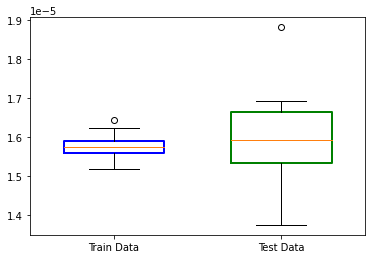

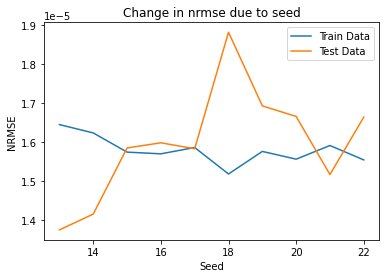

<Figure size 288x144 with 0 Axes>

In [19]:
#let the no of sample(fixed=1000)s and d denote dimensions(fixed=5)
n=10#1number of different seed
w_initialise=np.array([0.5,20,45,6,6])#any random value
#fixing i for multiple  seed value data 
# seed values are taken from 13 to 23 
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
X_a = input_x(1000,5)
t_a=out_t(X_a,w_initialise)
for i in range(n):
  x_train, x_val, t_train, t_test = train_test_split(X_a, t_a, test_size=0.2, random_state=13+i)
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.1)
  t_predict=lin_reg(x_val,w_train)
  nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train=np.sqrt(mse_pseudo_in_train)/np.var(t_train)
  nrmse_train_seed[i]=nrmse_train
  nrmse_test_seed[i]=nrmse_test
# print("Weights in train data :",w_train)
# print("Weights in test data :",w_test)
print("Train NRMSE with increasing seed : ",nrmse_train_seed )
print("Test NRMSE with increasing seed: ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to seed')
plt.xlabel("Seed")
plt.ylabel("NRMSE")
plt.plot(np.arange(n)+13,nrmse_train_seed,label ='Train Data')
plt.plot(np.arange(n)+13,nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

As we are taking different seed we can see there is more fluctuation in test data (which is natural) and less fluctuation in train data

Train NRMSE with increasing training samples size:  [0.00015441 0.00016557 0.00015699 0.00014766 0.0001749  0.00016236]
Test NRMSE with increasing training samples size:  [0.00016018 0.00014807 0.00015625 0.00016112 0.00015572 0.00015744]
Train NRMSE Variance :  7.511689376528552e-11
Train NRMSE Mean :  0.0001603176015874544
Test NRMSE Variance :  1.7922136816087985e-11
 Test NRMSE Mean :  0.00015646428806992708


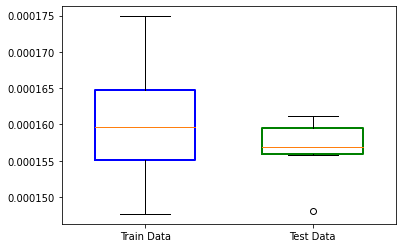

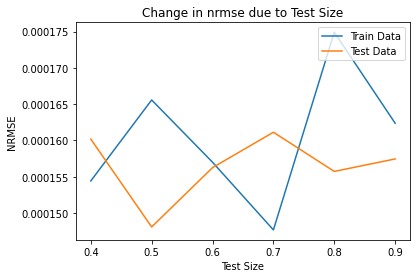

<Figure size 288x144 with 0 Axes>

In [20]:
#let n denote the no of samples and d denote dimensions(fixed=5)
train_size=np.array([0.4,0.5,0.6,0.7,0.8,0.9])
w_initialise=np.array([0.5,20,45,6,6])#any random value
#fixing i for multiple  seed value data 
# seed values are taken from 13 to 23 
nrmse_train_seed=np.zeros(np.size(train_size))
nrmse_test_seed=np.zeros(np.size(train_size))
X_a = input_x(1000,5)
np.random.seed()
t_a=out_t(X_a,w_initialise,5,10)
for i in range(np.size(train_size)):
  x_train, x_val, t_train, t_test = train_test_split(X_a, t_a, test_size=train_size[i])
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.1)
  t_predict=lin_reg(x_val,w_train)
  nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train=np.sqrt(mse_pseudo_in_train)/np.var(t_train)
  nrmse_train_seed[i]=nrmse_train
  nrmse_test_seed[i]=nrmse_test
# print("Weights in train data :",w_train)
# print("Weights in test data :",w_test)
print("Train NRMSE with increasing training samples size: ",nrmse_train_seed )
print("Test NRMSE with increasing training samples size: ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to Test Size')
plt.xlabel("Test Size")
plt.ylabel("NRMSE")
plt.plot(train_size,nrmse_train_seed,label ='Train Data')
plt.plot(train_size,nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

As number of sample are constant variance changes non linearly with different seeds.

Train NRMSE with increasing sample size :  [1.52096113e-05 1.62620776e-05 1.40517588e-05 1.66110354e-05]
Test NRMSE with increasing sample size:  [1.40225975e-05 2.66487992e-05 1.38965440e-05 1.76742269e-05]
Train NRMSE Variance :  9.98092180503501e-13
Train NRMSE Mean :  1.5533620778735892e-05
Test NRMSE Variance :  2.6887819221483475e-11
 Test NRMSE Mean :  1.8060541910242323e-05


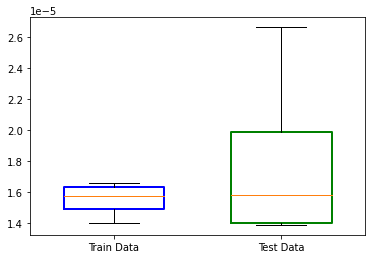

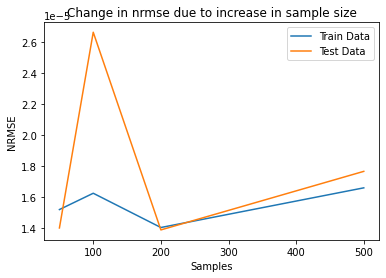

<Figure size 288x144 with 0 Axes>

In [21]:
#let n denote the no of samples and d denote dimensions(fixed=5)
samples=np.array([50,100,200,500])#number of samples
nrmse_train_seed=np.zeros(np.size(samples))
nrmse_test_seed=np.zeros(np.size(samples))
w_validate_a=np.array([0.5,20,45,6,6])
nrmse=np.zeros(samples)
for i in range(np.size(samples)):
  np.random.seed()
  X_a = input_x(samples[i],5)
  t_a=out_t(X_a,w_validate_a)
  x_train, x_val, t_train, t_test = train_test_split(X_a, t_a, test_size=0.2)
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.1)
  t_predict=lin_reg(x_val,w_train)
  nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train=np.sqrt(mse_pseudo_in_train)/np.var(t_train)
  nrmse_train_seed[i]=nrmse_train
  nrmse_test_seed[i]=nrmse_test
  
print("Train NRMSE with increasing sample size : ",nrmse_train_seed )
print("Test NRMSE with increasing sample size: ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in sample size')
plt.xlabel("Samples")
plt.ylabel("NRMSE")
plt.plot(samples,nrmse_train_seed,label ='Train Data')
plt.plot(samples,nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

As number of samples are increased NRMSE first increases upto 100 samples than decrease linearly for both training and validation data.

Part b) Training and validation NRMSE obtained using pseudo inverse with number of variables.
In this part I have written two code
- First code represents change in NRMSE withc change in dimensions
- Second Code change in seed with dimension constant. 

Train NRMSE with increasing dimensions :  [0.         1.03164112 0.04030511 0.01837686 0.01270007 0.01043911
 0.00862974 0.00713464 0.00585226 0.00444717]
Test NRMSE with increasing dimensions:  [0.         0.9485105  0.03749526 0.02000339 0.01162268 0.00890195
 0.00836272 0.00677693 0.00564222 0.00514023]
Train NRMSE Variance :  0.09368433086674113
Train NRMSE Mean :  0.11395260708310359
Test NRMSE Variance :  0.07911003206010583
 Test NRMSE Mean :  0.10524558753751352


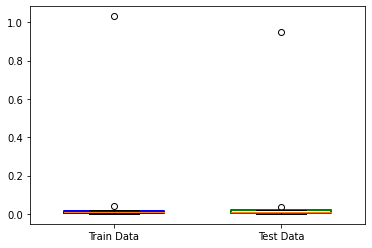

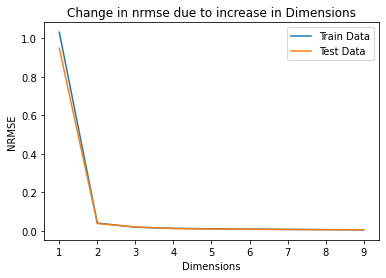

<Figure size 288x144 with 0 Axes>

In [22]:
#let n denote the no of samples(fixed=100) and d denote dimensions(variable)
d=10#Increase this value to see the sharp decrease
nrmse_train_seed=np.zeros(d)
nrmse_test_seed=np.zeros(d)

np.random.seed()
for i in range(1,d):
  np.random.seed()
  w_b = np.ones(i)
  in_x_b = input_x(1000,i)
  t_b=out_t(in_x_b,w_b)
  x_train, x_val, t_train, t_test = train_test_split(in_x_b, t_b, test_size=0.2)
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.1)
  t_predict=lin_reg(x_val,w_train)
  nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train=np.sqrt(mse_pseudo_in_train)/np.var(t_train)
  nrmse_train_seed[i]=nrmse_train
  nrmse_test_seed[i]=nrmse_test
  
print("Train NRMSE with increasing dimensions : ",nrmse_train_seed )
print("Test NRMSE with increasing dimensions: ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in Dimensions')
plt.xlabel("Dimensions")
plt.ylabel("NRMSE")
plt.plot(np.arange(1,d),nrmse_train_seed[1:],label ='Train Data')
plt.plot(np.arange(1,d),nrmse_test_seed[1:],label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()


Observation : 
- It can be easily seen that as number of dimension increases nrmse decreases very sharply. 
- Check values of NRMSE to verify.Don't see graph.

Train NRMSE with changing  seed size:  [0.         0.00137798 0.00145729 0.00124921 0.00134191 0.00131184
 0.00132865 0.00134707 0.00136974 0.00138025]
Test NRMSE with changing seed size:  [0.         0.00156951 0.0014204  0.00150835 0.00165991 0.00129126
 0.00137234 0.00101534 0.00161553 0.00146993]
Train NRMSE Variance :  1.6697347533967318e-07
Train NRMSE Mean :  0.0012163930662428336
Test NRMSE Variance :  2.164250542994193e-07
 Test NRMSE Mean :  0.0012922560049041243


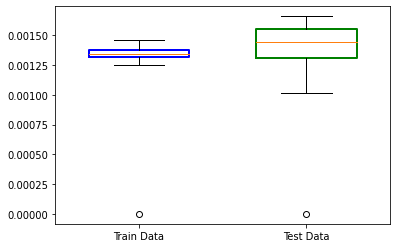

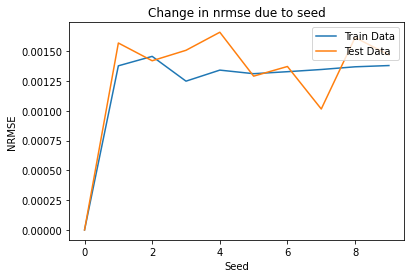

<Figure size 288x144 with 0 Axes>

In [35]:
#let n denote the no of samples(fixed=100) and d denote dimensions(variable)
d=30
n=10#number of different seeds
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
for i in range(1,n):
  np.random.seed(11+i)
  w_b = np.ones(d)
  in_x_b = input_x(1000,d)
  t_b=out_t(in_x_b,w_b)
  wz,y,mse_pseudo_in=weight_pseudo_in(in_x_b,t_b,1)
  x_train, x_val, t_train, t_test = train_test_split(in_x_b, t_b, test_size=0.2)
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.1)
  t_predict=lin_reg(x_val,w_train)
  nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train=np.sqrt(mse_pseudo_in_train)/np.var(t_train)
  nrmse_train_seed[i]=nrmse_train
  nrmse_test_seed[i]=nrmse_test

print("Train NRMSE with changing  seed : ",nrmse_train_seed )
print("Test NRMSE with changing seed : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to seed')
plt.xlabel("Seed")
plt.ylabel("NRMSE")
plt.plot(np.arange(n),nrmse_train_seed,label ='Train Data')
plt.plot(np.arange(n),nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

Observation : 
- As seed increases for fixed number of dimensions nrmse changes very randomly and non linearly.
- Here we can also see that variance in test data is higher than variance in train data

c) Training and validation NRMSE obtained using pseudo inverse with noise variance

Train NRMSE with increasing Noise Variance :  [2.40212344e-06 2.06405156e-05 3.72636226e-05 4.24877765e-05
 6.84427986e-05 8.43291737e-05 1.19220562e-04 1.38115603e-04
 1.42111934e-04 1.41786773e-04 1.43552250e-04 1.70024987e-04
 2.34735256e-04 2.31030879e-04 2.72694024e-04 2.45210449e-04
 3.47531594e-04 2.91297369e-04 3.10914569e-04 4.12501561e-04
 4.17000644e-04 3.38977468e-04 3.88399330e-04 3.75075092e-04
 5.25685520e-04 4.71610151e-04 5.51584296e-04 5.28671639e-04
 4.58629051e-04 6.10243015e-04]
Test NRMSE with increasing Noise Variance :  [3.43142752e-06 3.42369552e-05 4.18886307e-05 2.71560837e-04
 1.01988591e-04 1.00092087e-04 2.76210333e-04 1.25327636e-04
 4.84528333e-04 7.56326528e-05 7.77945027e-04 2.15854386e-03
 3.47668180e-04 3.16346430e-04 1.84284481e-04 4.45628769e-04
 1.37897704e-04 2.54560102e-04 7.34296600e-04 1.36022906e-04
 6.45559725e-04 7.92085584e-04 2.70935157e-04 7.35084851e-04
 2.89084263e-04 5.86199103e-04 1.15472930e-03 3.21756459e-04
 3.18603149e-04 1.64748

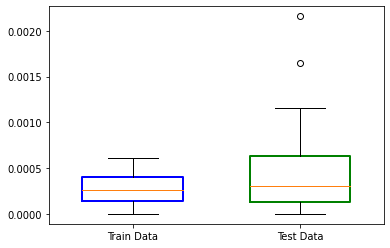

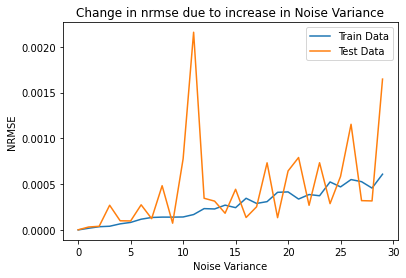

<Figure size 288x144 with 0 Axes>

In [24]:
#let n denote the noise variance(variable)
n=30

nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
w_initialise=np.array([0.5,20,45,6,6])
in_x_c=input_x(50,5)#fixed samples  and dimension
w0=0
for i in range(n):
  t_c=out_t(in_x_c,w_initialise,w0,i)
  x_train, x_val, t_train, t_test = train_test_split(in_x_c, t_c, test_size=0.1)
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.5)#lambda1=0.1
  t_predict=lin_reg(x_val,w_train)
  nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train=np.sqrt(mse_pseudo_in_train)/np.var(t_train)
  nrmse_train_seed[i]=nrmse_train
  nrmse_test_seed[i]=nrmse_test
  
print("Train NRMSE with increasing Noise Variance : ",nrmse_train_seed )
print("Test NRMSE with increasing Noise Variance : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in Noise Variance')
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.plot(np.arange(n),nrmse_train_seed,label ='Train Data')
plt.plot(np.arange(n),nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()


Observation : As noise variance increases we can see the sharp increase in NRMSE for both training and validation dataset.But the difference between two is that variance in test data is very high.
- By changing lambda one graph changes very much use value around 0.5 to see above effect
- By increasig lambda nrmse decreases but curve still follows the first point 

d) Training and validation NRMSE obtained using pseudo inverse with w0 

Train NRMSE with increasing Bias w0 :  [1.55287827e-06 1.67222341e-06 1.69564969e-06 1.66011858e-06
 1.82928103e-06 1.90426065e-06 2.00471130e-06 1.96231828e-06
 2.19133673e-06 2.32077428e-06]
Test NRMSE with increasing Bias w0 :  [1.24154250e-06 1.84151324e-06 1.83094717e-06 1.36053315e-06
 2.08408550e-06 2.21192018e-06 2.38159952e-06 1.69446969e-06
 2.55194253e-06 2.79954167e-06]
Train NRMSE Variance :  5.4921118067306226e-14
Train NRMSE Mean :  1.8793552217093952e-06
Test NRMSE Variance :  2.2727271260360394e-13
 Test NRMSE Mean :  1.9998095148606552e-06


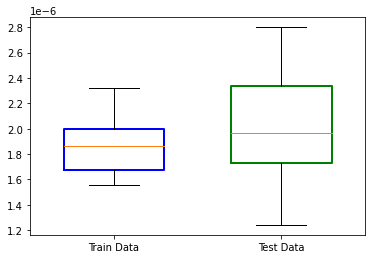

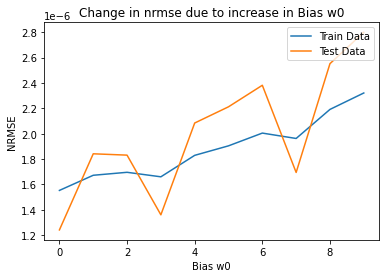

<Figure size 288x144 with 0 Axes>

In [25]:
#let n denote the no of samples(fixed=100) and d denote dimensions(fixed=5)
n=10
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
w_validate3=np.array([0.5,20,45,6,6])
in_x_d=input_x(100,5)
np.random.seed()
noise_var=0
for i in range(n):
  t_d=out_t(in_x_d,w_validate3,i,noise_var)
  x_train, x_val, t_train, t_test = train_test_split(in_x_d, t_d, test_size=0.2)
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.8)
  t_predict=lin_reg(x_val,w_train)
  nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_d)
  nrmse_train=np.sqrt(mse_pseudo_in_train)/np.var(t_d)
  nrmse_train_seed[i]=nrmse_train
  nrmse_test_seed[i]=nrmse_test
  
print("Train NRMSE with increasing Bias w0 : ",nrmse_train_seed )
print("Test NRMSE with increasing Bias w0 : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in Bias w0')
plt.xlabel("Bias w0")
plt.ylabel("NRMSE")
plt.plot(np.arange(n),nrmse_train_seed,label ='Train Data')
plt.plot(np.arange(n),nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()


Observation :
- With change in noise variance graph changes very much #check for noise_var=0,3,10. For all of them NRMSE is increasing for increase in w0 
- Also keep lambda high,mostly greater than 0.5 

e) Training and validation NRMSE obtained using pseudo inverse with lambda

Train NRMSE with increasing lambda_one :  [1.04269241e-05 1.04269279e-05 1.04269396e-05 1.04269589e-05
 1.04269860e-05 1.04270209e-05 1.04270635e-05 1.04271139e-05
 1.04271719e-05 1.04272378e-05 1.04273113e-05 1.04273926e-05
 1.04274817e-05 1.04275785e-05 1.04276830e-05 1.04277952e-05
 1.04279152e-05 1.04280429e-05 1.04281783e-05 1.04283215e-05
 1.04284724e-05 1.04286310e-05 1.04287973e-05 1.04289714e-05
 1.04291532e-05 1.04293427e-05 1.04295399e-05 1.04297449e-05
 1.04299575e-05 1.04301779e-05 1.04304060e-05 1.04306418e-05
 1.04308853e-05 1.04311365e-05 1.04313954e-05 1.04316620e-05
 1.04319364e-05 1.04322184e-05 1.04325082e-05 1.04328056e-05
 1.04331107e-05 1.04334236e-05 1.04337441e-05 1.04340723e-05
 1.04344082e-05 1.04347518e-05 1.04351031e-05 1.04354621e-05
 1.04358287e-05 1.04362030e-05]
Test NRMSE with increasing lambda_one :  [1.01852619e-05 1.01859214e-05 1.01865894e-05 1.01872658e-05
 1.01879507e-05 1.01886439e-05 1.01893456e-05 1.01900557e-05
 1.01907742e-05 1.01915012e-05 

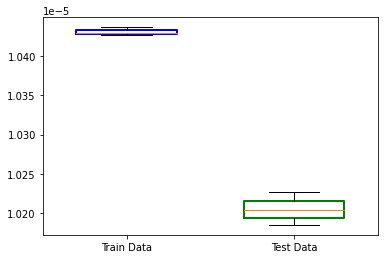

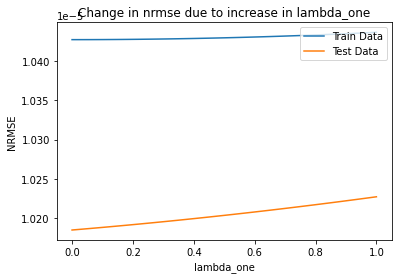

<Figure size 288x144 with 0 Axes>

In [26]:
#let n denote the no of samples(fixed=100) and d denote dimensions(fixed=5)
#range of lambda 1 chosen from 0.000001 to 100
n=50
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
#lambda_one=np.array([-100,-10,-1,0.0001,.001,.01,.1,1,10,100])
lambda_one=np.linspace(0,1,n)
w_train = np.array([1,23,54,8,9])
in_x_e=input_x(500,5)
np.random.seed()
noise_var=1
w0=1
t_e=out_t(in_x_e,w_train,i,noise_var)
x_train, x_val, t_train, t_test = train_test_split(in_x_e, t_e, test_size=0.2)
for i in range(np.size(lambda_one)):
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,lambda_one[i])
  t_predict=lin_reg(x_val,w_train)
  nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_e)
  nrmse_train=np.sqrt(mse_pseudo_in_train)/np.var(t_e)
  nrmse_train_seed[i]=nrmse_train
  nrmse_test_seed[i]=nrmse_test
print("Train NRMSE with increasing lambda_one : ",nrmse_train_seed )
print("Test NRMSE with increasing lambda_one : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in lambda_one')
plt.xlabel("lambda_one")
plt.ylabel("NRMSE")
plt.plot(lambda_one,nrmse_train_seed,label ='Train Data')
plt.plot(lambda_one,nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

#it should look like u shaped

by changing lambda these curves changes very much try lesser lambda

f) Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points

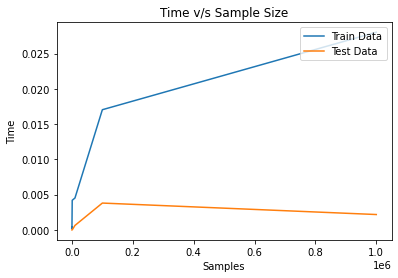

<Figure size 288x144 with 0 Axes>

In [27]:
import time
samples=np.array([10,100,1000,10000,100000,1000000])
time_count_train=np.zeros(np.size(samples))
time_count_test=np.zeros(np.size(samples))
np.random.seed()
w_train = np.array([1,23,54,8,9])
w_validate_f=np.array([0.5,20,45,6,6])
for i in range(np.size(samples)):
  in_x_f = input_x(samples[i],5)
  t_f=out_t(in_x_f,w_validate_f)
  x_train, x_val, t_train, t_test = train_test_split(in_x_f, t_f, test_size=0.2)
  tic = time.perf_counter()
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.1)
  toc = time.perf_counter()
  time_count_train[i]=toc-tic
  tic = time.perf_counter()
  t_predict=lin_reg(x_val,w_train)
  toc = time.perf_counter()
  time_count_test[i]=toc-tic

plt.title('Time v/s Sample Size')
plt.xlabel("Samples")
plt.ylabel("Time")
plt.plot(samples,time_count_train,label ='Train Data')
plt.plot(samples,time_count_test,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

With increasing samples upto $10^7$ terms program is running but for $10^9$ samples it lasted more than 30 minutes until interupted.It is nonlinear upto 1000 samples and after that it is completely linear.

g) Training and validation NRMSE obtained using gradient descent with max_iter 

Train NRMSE with increasing max_iter :  [0.00000000e+00 6.84820035e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06 6.84723830e-06
 6.84723830e-06 6.84723830e-06 6.84723830e-06

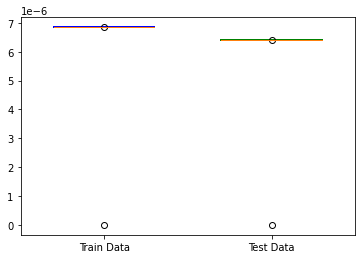

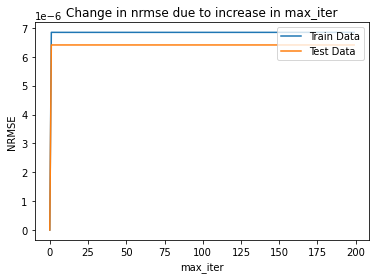

<Figure size 288x144 with 0 Axes>

In [28]:
n= 200 #Here n is max_iter(variable)

nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
np.random.seed(1)
in_x_g = input_x(1000,8)
w_g = np.array([11,23,54,8,9,33,46,78])
t=out_t(in_x_g,w_g)
eta = 0.0001
lambda2 = 0
lambda1 = 1
min_change_NRMSE = 0.0000001
x_train, x_val, t_train, t_test = train_test_split(in_x_g, t, test_size=0.2)
for i in range(1,n):
  final_w_train, final_nrmse_train ,no_iter_train= linear_regression_grad_desc(x_train, t_train, w_g, eta, lambda2, lambda1, min_change_NRMSE,i)
  #print(no_iter_train)
  t_predict=lin_reg(x_val,final_w_train)
  final_nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train_seed[i]=final_nrmse_train
  nrmse_test_seed[i]=final_nrmse_test

print("Train NRMSE with increasing max_iter : ",nrmse_train_seed )
print("Test NRMSE with increasing max_iter : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in max_iter')
plt.xlabel("max_iter")
plt.ylabel("NRMSE")
plt.plot(np.arange(n),nrmse_train_seed,label ='Train Data')
plt.plot(np.arange(n),nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()
#it should monotonically decrease

Observation : we can say that max_iter doesn't have difference between test and train data at lower values upto 200.

h) Training and validation NRMSE obtained using gradient descent with eta

Train NRMSE with increasing eta :  [0.00266163 0.00266163 0.00266163 0.00266163 0.00268703 0.00292584
 0.00296183 0.002962   0.00294424        inf        inf]
Test NRMSE with increasing eta :  [0.00295115 0.00295115 0.00295115 0.00295115 0.00301338 0.00338701
 0.00344686 0.00344769 0.00350752        inf        inf]
Train NRMSE Variance :  nan
Train NRMSE Mean :  inf
Test NRMSE Variance :  nan
 Test NRMSE Mean :  inf


/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-17-797c5d56c572>:6: RuntimeWarning: invalid value encountered in double_scalars
  while( number_iterations < max_iter and  min_change_NRMSE<abs(old_nrmse - new_nrmse)) :
<ipython-input-9-8c0affc54b5e>:2: RuntimeWarning: overflow encountered in square
  mse=np.mean((t-y)**2)#np.mean is used to find mean
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


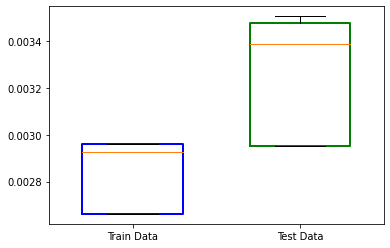

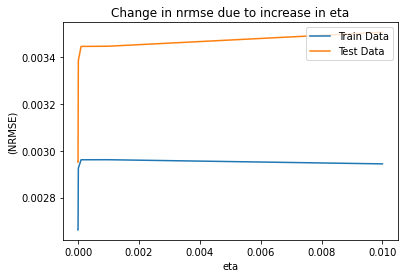

<Figure size 288x144 with 0 Axes>

In [29]:
n= 11 #Here n is number of  eta(variable)
eta=np.array([0.00000000001,0.000000001,0.00000001,0.00000001,.000001,0.00001,.0001,0.001,0.01,.1,1])#Size of this matrix should be eqal to #n
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
np.random.seed(1)
in_x_h = input_x(200,5)
w_h = np.array([1,3,4,8,9])
w0=2
t=out_t(in_x_h,w_h,w0,10)
x_train, x_val, t_train, t_test = train_test_split(in_x_h, t, test_size=0.2)
lambda2 = 1
lambda1 = 1
min_change_NRMSE = 0.000000001
max_iter=10000
for i in range(n):
  final_w_train, final_nrmse_train ,no_iter_train= linear_regression_grad_desc(x_train, t_train, w_h, eta[i], lambda2, lambda1, min_change_NRMSE,max_iter)
  t_predict=lin_reg(x_val,final_w_train)
  final_nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train_seed[i]=final_nrmse_train
  nrmse_test_seed[i]=final_nrmse_test
print("Train NRMSE with increasing eta : ",nrmse_train_seed )
print("Test NRMSE with increasing eta : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in eta')
plt.xlabel("eta")
plt.ylabel("(NRMSE)")
plt.plot(eta,(nrmse_train_seed),label ='Train Data')
plt.plot(eta,(nrmse_test_seed),label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

Observation : 
- As eta increases nrmse initially decreases and then increases abrubtly very high rate above eta 0.01 nrmse becomes very high (infinity)
- nrmse in test is higher than with the train data but the difference is almost constant

i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points

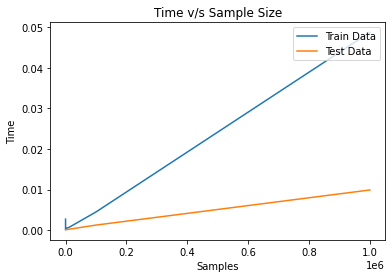

<Figure size 288x144 with 0 Axes>

In [30]:
n= 10000 #Here n is number of samples(variable)
samples=np.array([10,100,1000,10000,100000,1000000])
time_count_train=np.zeros(np.size(samples))
time_count_test=np.zeros(np.size(samples))
nrmse=np.zeros(n)
np.random.seed(1)
w_i = np.array([11,23,54,8,9,33,46,78])
eta = 0.000001
lambda2 = 0.1
lambda1 = 0.1
min_change_NRMSE = 0.000000001
max_iter=500
for i in range(np.size(samples)):
  in_x_i = input_x(samples[i],8)
  t_i=out_t(in_x_i,w_i)
  x_train, x_val, t_train, t_test = train_test_split(in_x_i, t_i, test_size=0.2)
  final_w, final_nrmse ,no_iter= linear_regression_grad_desc(in_x_i, t_i, w_i, eta, lambda2, lambda1, min_change_NRMSE,max_iter)
  tic = time.perf_counter()
  w_train,y_train,mse_pseudo_in_train=weight_pseudo_in(x_train,t_train,0.1)
  toc = time.perf_counter()
  time_count_train[i]=toc-tic
  tic = time.perf_counter()
  w_test,y_test,mse_pseudo_in_test=weight_pseudo_in(x_val,t_test,0.1)
  toc = time.perf_counter()
  time_count_test[i]=toc-tic

plt.title('Time v/s Sample Size')
plt.xlabel("Samples")
plt.ylabel("Time")
plt.plot(samples,time_count_train,label ='Train Data')
plt.plot(samples,time_count_test,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

Observation : As number of samples increases time taken increases linearly.

j) Time taken to solve gradient descent with number of variables and its breaking point \\
**Skipped**

k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2 

Train NRMSE with increasing lambda2 :  [0.67281374 0.67286505 0.67295666 0.6730861  0.67325107 0.67344941
 0.67367906 0.6739381  0.67422471 0.67453718]
Test NRMSE with increasing lambda2 :  [0.58353305 0.58299917 0.58252575 0.58210954 0.58174748 0.58143665
 0.58117432 0.58095787 0.58078484 0.5806529 ]
Train NRMSE Variance :  3.226165194107343e-07
Train NRMSE Mean :  0.673480107509959
Test NRMSE Variance :  8.64520912734479e-07
 Test NRMSE Mean :  0.5817921578334871


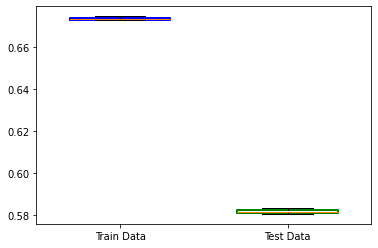

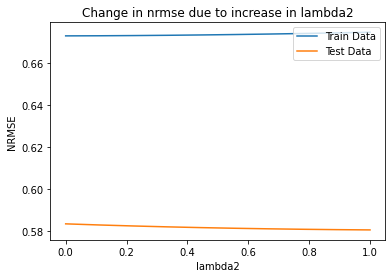

<Figure size 288x144 with 0 Axes>

In [31]:
n= 10 #Here n is number of lambda 2 values(variable)
lambda2=np.linspace(0,1,n)#Size of this matrix should be eqal to #n
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
np.random.seed(1)
in_x_k = input_x(500,5)
w_k = np.array([.01,.03,.046,.088,.19])#nearly zero weights
t_k=out_t(in_x_k,w_k)
x_train, x_val, t_train, t_test = train_test_split(in_x_k, t_k, test_size=0.2)
eta = 0.00001
lambda1 = 0.1
min_change_NRMSE = 0.0000001
max_iter=100000
for i in range(n):
  final_w_train, final_nrmse_train ,no_iter_train= linear_regression_grad_desc(x_train, t_train, w_k, eta, lambda2[i], lambda1, min_change_NRMSE,max_iter)
  t_predict=lin_reg(x_val,final_w_train)
  final_nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train_seed[i]=final_nrmse_train
  nrmse_test_seed[i]=final_nrmse_test

print("Train NRMSE with increasing lambda2 : ",nrmse_train_seed )
print("Test NRMSE with increasing lambda2 : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in lambda2')
plt.xlabel("lambda2")
plt.ylabel("NRMSE")
plt.plot(lambda2,nrmse_train_seed,label ='Train Data')
plt.plot(lambda2,nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

Observation :
- Optimal lambda2 is coming out to be 1.
- Error increases non linearly(looks like quadratic) with increase in 

l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1

Train NRMSE with increasing lambda1 :  [0.77116644 0.77147507 0.77184539 0.77227729 0.77277069 0.77332545
 0.77394146 0.77461856 0.77535659 0.77615539 0.77701475 0.77793449
 0.77891438 0.77995421 0.78105372 0.78221268 0.78343081 0.78470784
 0.78604349 0.78743745]
Test NRMSE with increasing lambda1 :  [0.73703176 0.73714464 0.73731828 0.73755265 0.73784768 0.7382033
 0.73861943 0.73909596 0.73963277 0.74022974 0.74088671 0.74160354
 0.74238004 0.74321603 0.74411131 0.74506566 0.74607886 0.74715067
 0.74828083 0.74946909]
Train NRMSE Variance :  2.5242518164476207e-05
Train NRMSE Mean :  0.7775818081784878
Test NRMSE Variance :  1.5068317902549996e-05
 Test NRMSE Mean :  0.7415459480758345


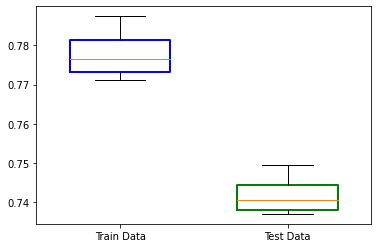

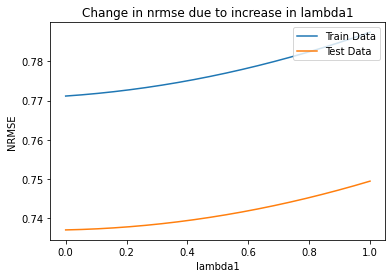

<Figure size 288x144 with 0 Axes>

In [32]:
n= 20 #Here n is number of lambda 1 values(variable)
#lambda1=np.array([0.001,0.01,0.1,1,5,10,100,150,200,300,318,330,350,400,500,1000,2000,3000])#Size of this matrix should be eqal to #n
lambda1=np.linspace(0,1,n)#Size of this matrix should be eqal to #n
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
np.random.seed(1)
in_x_l = input_x(5000,5)#dont change input
w_l = np.array([.01,.2,.14,.03,.09])
t_l=out_t(in_x_l,w_l)
x_train, x_val, t_train, t_test = train_test_split(in_x_l, t_l, test_size=0.2)
eta = 0.0001
lambda2 = 1
min_change_NRMSE = 0.0000001
max_iter=1000
for i in range(n):
  final_w_train, final_nrmse_train ,no_iter_train= linear_regression_grad_desc(x_train, t_train, w_l, eta, lambda2, lambda1[i], min_change_NRMSE,max_iter)
  t_predict=lin_reg(x_val,final_w_train)
  final_nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train_seed[i]=final_nrmse_train
  nrmse_test_seed[i]=final_nrmse_test

print("Train NRMSE with increasing lambda1 : ",nrmse_train_seed )
print("Test NRMSE with increasing lambda1 : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in lambda1')
plt.xlabel("lambda1")
plt.ylabel("NRMSE")
plt.plot(lambda1,nrmse_train_seed,label ='Train Data')
plt.plot(lambda1,nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

Observation : 
- Optimum value of lambda1 turns to be around 0 \
- Change in eta causes lot of change in characteristic curve(dont decrease too much)

m) Training and validation NRMSE for optimal lambda2 with noise variance

Train NRMSE with increasing noise Variance :  [0.01253414 0.01210914 0.01266917 0.01307146 0.01281558 0.01295113
 0.01395326 0.0143174  0.01464929 0.01488991 0.01483351 0.01611378
 0.01605051 0.01629265 0.01547864 0.01737626 0.01849871 0.01897149
 0.01751549 0.01804906]
Test NRMSE with increasing noise Variance :  [0.01155831 0.01381115 0.01178431 0.01203627 0.01409201 0.01277968
 0.01419738 0.01499895 0.01570862 0.01548339 0.02086379 0.01756329
 0.01550256 0.01604185 0.02089785 0.01966076 0.01811092 0.01656052
 0.01872749 0.01809909]
Train NRMSE Variance :  4.3659633368298435e-06
Train NRMSE Mean :  0.015157029473653837
Test NRMSE Variance :  7.842821794616715e-06
 Test NRMSE Mean :  0.015923909468875487


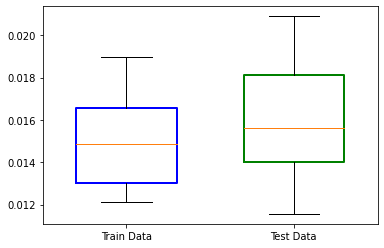

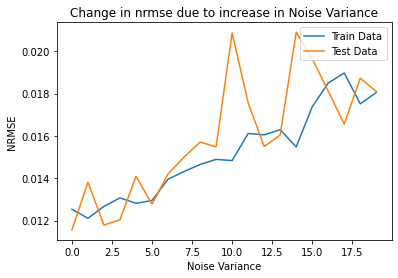

<Figure size 288x144 with 0 Axes>

In [33]:
n= 20 #Here n is number of noise variance values(variable)
#Size of this matrix should be eqal to #n
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
np.random.seed(1)
in_x_l = input_x(1000,5)#dont change input
w_l = np.array([1,2,4,3,.29])
w0=10
eta = 0.000001
lambda2 = 1 #optimal
lambda1 = 0.1
min_change_NRMSE = 0.00000001
max_iter=1000
for i in range(n):
  t_l=out_t(in_x_l,w_l,w0,i)
  x_train, x_val, t_train, t_test = train_test_split(in_x_l, t_l, test_size=0.2)
  final_w_train, final_nrmse_train ,no_iter_train= linear_regression_grad_desc(x_train, t_train, w_l, eta, lambda2, lambda1, min_change_NRMSE,max_iter)
  t_predict=lin_reg(x_val,final_w_train)
  final_nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train_seed[i]=final_nrmse_train
  nrmse_test_seed[i]=final_nrmse_test

print("Train NRMSE with increasing noise Variance : ",nrmse_train_seed )
print("Test NRMSE with increasing noise Variance : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in Noise Variance')
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.plot(np.arange(n),nrmse_train_seed,label ='Train Data')
plt.plot(np.arange(n),nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

Observation : As noise variance increases both test and train NRMSE increases and the variance in test data is much higher than that of train data.

n) Training and validation NRMSE for optimal lambda1 with noise variance 

Train NRMSE with increasing noise Variance :  [0.01583491 0.01657399 0.0180611  0.01910525 0.02084737 0.02247416
 0.02686922 0.02769893 0.02800147 0.03144855 0.03204839 0.03216196
 0.03243424 0.03330494 0.03165402 0.03240171 0.03403462 0.0318081
 0.03218277 0.0324144  0.03331849 0.02999611 0.03006896 0.03163395
 0.0295232  0.0288939  0.02862654 0.02648576 0.02600145 0.02706358
 0.02577964 0.02670405 0.02559906 0.02609578 0.02381823 0.02364296
 0.02282599 0.02361915 0.02291162 0.02340805 0.021596   0.02091745
 0.02172222 0.02074938 0.02008152 0.02005596 0.01937419 0.01961613
 0.02038804 0.0180321 ]
Test NRMSE with increasing noise Variance :  [0.01551931 0.01653799 0.01636678 0.02206168 0.02619282 0.02575345
 0.0251658  0.03037463 0.03435761 0.03279609 0.03596632 0.03793978
 0.02921949 0.03344183 0.03807408 0.03724742 0.03835869 0.03621511
 0.03182869 0.03135908 0.03241247 0.0315444  0.03081041 0.0256249
 0.02946158 0.0301853  0.02718989 0.02996508 0.02667541 0.02871212
 0.02515597 0.02

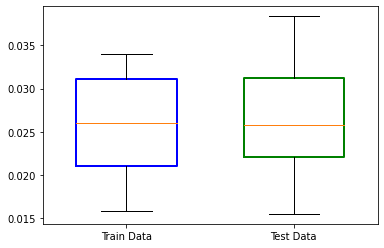

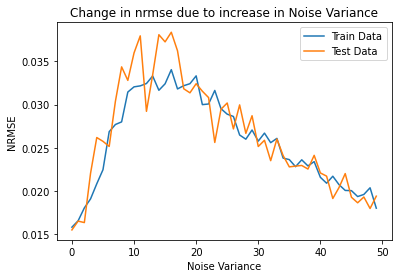

<Figure size 288x144 with 0 Axes>

In [34]:
n= 50 #Here n is number of noise variance values(variable)
#Size of this matrix should be eqal to #n
nrmse_train_seed=np.zeros(n)
nrmse_test_seed=np.zeros(n)
np.random.seed(1)
in_x_l = input_x(1000,5)#dont change input
w_l = np.array([1,.2,.4,3,.29])
w0=10
eta = 0.001
lambda2 = 1 #optimal
lambda1 = 0.1#taken near to zero
min_change_NRMSE = 0.00000001
max_iter=1000
for i in range(n):
  t_l=out_t(in_x_l,w_l,w0,i)
  x_train, x_val, t_train, t_test = train_test_split(in_x_l, t_l, test_size=0.2)
  final_w_train, final_nrmse_train ,no_iter_train= linear_regression_grad_desc(x_train, t_train, w_l, eta, lambda2, lambda1, min_change_NRMSE,max_iter)
  t_predict=lin_reg(x_val,final_w_train)
  final_nrmse_test=np.sqrt((mean_square_error(t_test,t_predict)))/np.var(t_test)
  nrmse_train_seed[i]=final_nrmse_train
  nrmse_test_seed[i]=final_nrmse_test

print("Train NRMSE with increasing noise Variance : ",nrmse_train_seed )
print("Test NRMSE with increasing noise Variance : ",nrmse_test_seed )
print("Train NRMSE Variance : ",np.var(nrmse_train_seed))
print("Train NRMSE Mean : ",np.mean(nrmse_train_seed))
print("Test NRMSE Variance : ",np.var(nrmse_test_seed))
print(" Test NRMSE Mean : ",np.mean(nrmse_test_seed))

# create the figure and axes
fig, ax = plt.subplots()
# create the boxplots
bp1 = ax.boxplot(nrmse_train_seed, positions=[1], widths=0.6)
bp2 = ax.boxplot(nrmse_test_seed, positions=[2], widths=0.6)
# customize the boxplots
for box in bp1['boxes']:
    box.set(color='blue', linewidth=2)
for box in bp2['boxes']:
    box.set(color='green', linewidth=2)
# set the x-axis labels
ax.set_xticklabels(['Train Data', 'Test Data'])
plt.show()
plt.title('Change in nrmse due to increase in Noise Variance')
plt.xlabel("Noise Variance")
plt.ylabel("NRMSE")
plt.plot(np.arange(n),nrmse_train_seed,label ='Train Data')
plt.plot(np.arange(n),nrmse_test_seed,label ='Test Data')
plt.legend(loc = "upper right")
plt.figure(figsize=(4, 2))
plt.show()

Observation : 
- Firstly with noise variance both test and train data NRMSE increases upto variance 10 and then decreases fastly.
- Here also variance in test data is higher than that of train data. 

o) Experiment (f) but, this time with number of training samples and number of variables \
**Skipped**

#### **Learning Points**
1. First and most important learning is that don't use the randomly generated data for analysis because it will create more confusion whether your code is correct or not.
2. Time taken for same samples and dimension for linear regression using pseudo inverse method is way less than time taken using gradient descent method.This can be understood by code size also.
3. Learned how to split the input data into training and validation sets and how to validate the model using the validation set.
4. Learned how to plot Boxplot for various distributions.
5. Learned Linear Regression from Scratch using two methods Pseudo Inverse with L2 Regularization and Gradiet Descent method.
6. Learned how to manage and vary the hyperparameters to get the optimal results.


Resources :
1. https://towardsdatascience.com/simple-linear-regression-in-python-numpy-only-130a988c0212
2. https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc
3. https://youtu.be/xrPZbHrxrWo
4. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
5. Boxplot code taken from : https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html
6. Understood code snippets from above sources on ChatGPT

Code Discussed with friends : Only discussed 13th question theory and maths implementation part.
1. Dinesh Kumar Panwar 22M1080
2. Karra Maneesha 22M1076